<p style="border: 2px solid black; font-family:calibri; font-size:100%; color:black; text-align:center; border-radius: 5rem; padding:10px;">Rami Majadbeh & Nasser Awwad</p>





# Introduction

Handwriting recognition is a side of computer vision that involves converting handwritten text, like paper documents or digital interfaces, into a format understandable by machines. This task has grown in complexity and importance with the expansion of digital devices.

Convolutional Neural Networks (CNNs) have become the backbone of image recognition tasks, including handwriting recognition. CNNs excel in extracting hierarchical features from images, starting from simple edges at the initial layers to complex patterns in the deeper layers. This capability makes them exceptionally suitable for recognizing varied handwriting styles, where noise in character shapes and sizes are important.

Task 1: Building a Custom CNN<br>
In the first task, the focus is on constructing a custom CNN model. This involves defining specific metrics to evaluate the model's performance. By referencing existing CNN designs and adapting them with some modifications, the aim is to tailor the network to better suit the arabic handwriting recognition. The process involves selecting the number of layers, filter sizes, and other hyperparameters to optimize the model for this specific task.

Task 2: Implementing Data Augmentation to Task 1<br>
The second task involves the same CNN architecture as Task 1, but with data augmentation. Data augmentation is a technique used to expand the training dataset by introducing variations in the data. This can include transformations like rotating, scaling, or skewing the images. In arabic handwriting recognition, this simulates various handwriting styles and conditions, as a result enhancing the model's ability to generalize and perform well on unseen data.

Task 3: Utilizing LeNet-5<br>
Task 3 shifts the focus to a well-known CNN architecture, LeNet-5. This model is simpler and less complex compared to many modern CNNs. The idea here is to explore the trade-off between model complexity and accuracy. LeNet-5, with its historical significance and simpler structure, provides a different perspective on model efficiency and performance in handwriting recognition tasks.

Task 4: Applying Transfer Learning<br>
In the final task, transfer learning is employed, a method where a model developed for one task is reused as the starting point for a model on a second task. This approach has shown excellent results in other tasks and in this task in particular. By utilizing pre-trained networks and fine-tuning them for arabic handwriting recognition, you leverage learned features from vast amounts of data, which might not be directly available for your specific task.

 Model Evaluation:<br>
Throughout all tasks, models are evaluated based on their accuracy in both training and testing phases. Additionally, performance is monitored through various curves, including training loss vs. epoch, validation loss vs. epoch, training accuracy vs. epoch, and testing accuracy vs. epoch. These curves provide insight into how well the models learn over time and their generalization capabilities on new, unseen data.


# Dataset

The dataset is composed of gray-level images featuring handwritten characters from the Arabic alphabet. It is designed to ease the development and evaluation of machine learning models for the task of Arabic handwritten character recognition.

Content:

Training Set: Contains 13,440 images.<br>
Test Set: Contains 3,360 images.<br>
Each image in the dataset is a single channel (grayscale) representation of an Arabic letter, which means there is no need for taking color information, but rather focus on textural and shape features pertinent to character recognition.

Characteristics of the Dataset:

Grayscale Images: The images are in gray scale, where pixel intensity values range from 0 (black) to 255 (white). T<br>
Arabic Characters: The dataset represents characters from the Arabic alphabet, which includes distinctive shapes of the word.<br>
Handwritten Variability: The dataset likely captures a wide variability in handwriting styles, which is a challenge for models to recognize characters with high accuracy.<br>
Image Size: The dimensions of each image are 32 * 32 * 1.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from keras.models import Sequential
from tensorflow.keras.utils import load_img, img_to_array
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
arabic_alphabets = [
    'ا', 'ب', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'س', 'ش', 'ص', 'ض', 'ط', 'ظ', 'ع', 'غ', 'ف', 'ق', 'ك', 'ل', 'م', 'ن', 'ه', 'و', 'ي'
]

numbers_to_arabic = {i: arabic_alphabets[i-1] for i in range(1, 29, 1)}
numbers_to_arabic

{1: 'ا',
 2: 'ب',
 3: 'ت',
 4: 'ث',
 5: 'ج',
 6: 'ح',
 7: 'خ',
 8: 'د',
 9: 'ذ',
 10: 'ر',
 11: 'ز',
 12: 'س',
 13: 'ش',
 14: 'ص',
 15: 'ض',
 16: 'ط',
 17: 'ظ',
 18: 'ع',
 19: 'غ',
 20: 'ف',
 21: 'ق',
 22: 'ك',
 23: 'ل',
 24: 'م',
 25: 'ن',
 26: 'ه',
 27: 'و',
 28: 'ي'}

- This dictonairy maps the arabic alphabets to numbers corresponding to their labels in numbers.

# Functions

## Model Class

## Import Training Data

In [3]:
# read all training images and store them 

path = "/kaggle/input/chars-train/train"

image_files = [file for file in os.listdir(path) if file.endswith('.png')]

images = []
labels = []

for imageFile in image_files:
    imagePath = os.path.join(path, imageFile)
    img = load_img(imagePath, target_size=(32, 32), color_mode = "grayscale")

    img_array = img_to_array(img)

    label = int(imageFile.split('.')[0].split('_')[3])

    images.append(img_array)
    labels.append(label)

X_train = np.array(images)
y_train = np.array(labels)

le = LabelEncoder()
y_train = le.fit_transform(y_train)

- In this cell, the images of the training set are read from the file and then are each image is converted to a numpy array, and the label is extracted.

- The training images are saved in x_train and the labels are saved in y_train. y_train is label encoded, which changes it from  into integer values starting from 0 and going up to 27.



## Data Standardization

In [4]:
X_train_normalized = X_train / 255.0
y_train_one_hot = to_categorical(y_train - 1, num_classes=28)

- We normalize the training data, so initally the data is from 0 - 255, then Normalizing these values to a range between 0 and 1 makes the training process more stable and faster, and makes the data converge faster.

- for the y_train_one_hot that converts integers to a binary class matrix. each label is converted to a 28-element binary vector, with all elements set to 0 except for the index corresponding to the label's class, which is set to 1. The reason is that the model output is expected to be a probability distribution across multiple classes.

## Import Testing Data 

In [5]:
test_path = "/kaggle/input/chars-testing/test"

# Load the test data
test_image_files = [file for file in os.listdir(test_path) if file.endswith('.png')]

test_images = []
test_labels = []

for imageFile in test_image_files:
    imagePath = os.path.join(test_path, imageFile)
    img = load_img(imagePath, target_size=(32, 32), color_mode="grayscale")
    
    img_array = img_to_array(img)
    
    label = int(imageFile.split('.')[0].split('_')[3])
    
    test_images.append(img_array)
    test_labels.append(label)

X_test = np.array(test_images)
y_test = np.array(test_labels)

# Encode test labels
y_test_label = le.transform(y_test)

# Normalize test data
X_test_normalized = X_test / 255.0

# Convert test labels to one-hot encoding
y_test_one_hot = to_categorical(y_test_label - 1, num_classes=28)

- What is done here is the same as was done in the training cell, same was also done with the labels (y_test).

## Plotting History Of Training

In [28]:
def plot_hist(hist_to_plot):
    # Plot training loss vs. epoch
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(hist_to_plot.history['loss'], label='Training Loss')
    plt.plot(hist_to_plot.history['val_loss'], label='Testing Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Testing Loss')
    plt.legend()

    # Plot training accuracy vs. epoch
    plt.subplot(1, 2, 2)
    plt.plot(hist_to_plot.history['accuracy'], label='Training Accuracy')
    plt.plot(hist_to_plot.history['val_accuracy'], label='Testing Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Testing Accuracy')
    plt.legend()

    plt.show()

# Printing Results

In [7]:
def results(model_name,results): # this function prints the results in a table with good visualization

    train_acc = results[0]
    test_acc = results[1]
    train_loss = results[2]
    test_loss = results[3]
    epochs = results[4]

    results = pd.DataFrame(data=[train_acc,test_acc,train_loss,test_loss,epochs],index=['Training Accuracy','Testing Accuracy','Training Loss','Testing Loss','Epochs'],columns = [model_name])

    results.iloc[0:2] = (results.iloc[0:2]*100).round(2).astype(str) + '%'
    results.iloc[2:4] = results.iloc[2:4].applymap(lambda x: f'{x:.2f}')
    
     # Create a figure for plotting
    fig, ax1 = plt.subplots(figsize=(4, 4))

    table = ax1.table(cellText=results.values, colLabels=results.columns, rowLabels=results.index, loc='center')
    table.scale(0.6, 4.2)
    table.set_fontsize(12)
    ax1.axis('tight')
    ax1.axis('off')

    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('#083877')
            cell.set_text_props(fontsize=12, color='white', fontweight='bold')

    # Show the table
    plt.show()

# Displaying Some Predictions

In [8]:
def Display_Predictions(model): # this function displays the first 10 images with predicted and true labels

    predictions = model.predict(X_test_normalized)
    predicted_labels = np.argmax(predictions, axis=1)
   
    plt.figure(figsize=(15, 6))
    for i in range(10):
        plt.subplot(2, 5, i+1)
        plt.imshow(X_test[i], cmap='gray')
        plt.title(f"True: {numbers_to_arabic[y_test_label[i]  % 28 + 1]}\nPredicted: {numbers_to_arabic[(predicted_labels[i] + 1) % 28 + 1]}")
        plt.axis('off')

    plt.show()

# Task 1

## CNN-14

In the study presented in the paper, a new model named CNN-14 was developed for the recognition of Arabic handwritten characters. This model is composed of 14 layers, including 8 convolutional layers, 4 max-pooling layers, and additional fully connected layers culminating in an output layer. The secret of CNN-14 lies in its depth and its ability to extract features from input images effectively. The researchers added preprocessing steps before the input layer to improve the model's performance.

The CNN-14 model was carefully trained and tested on two datasets: the Arabic Handwritten Character Dataset (AHCD) and the Hijja dataset. The model achieved impressive results, with an accuracy of 99.36% on the AHCD dataset and 94.35% on the Hijja dataset​​.

The success of the CNN-14 model can be attributed to its deep layered architecture, which allowed for the extraction of abstract features from the images, a critical factor in the accurate recognition of the complex and handwriting nature of Arabic script. Furthermore, the preprocessing of images ensures that the model receives standardized and optimized input, reducing variability and improving the model's efficiency.

The high accuracy rates on both datasets demonstrate that CNN-14 is a powerful model that can handle the complexity of Arabic handwritten character recognition effectively. It shows the potential of deep learning models to understand and digitize handwritten text, which is particularly challenging in the Arabic language due to its unique characteristics.


Reference: Alsayed, Alhag & Li, Chunlin & Ahamed, & Hazim, Mohammed & Obied, Zainab. (2023). Arabic
Handwritten Character Recognition Using Convolutional Neural Networks.
10.21203/rs.3.rs-3141935/v1. 

## Initilizating Model

In [9]:
from tensorflow.keras.regularizers import l2

class CharacterRecognitionModel:
    def __init__(self, input_shape=(32, 32, 1), num_classes=28, l2_reg=0.001):
        self.model = Sequential()
        
        # Convolutional layers with Batch Normalization and L2 Regularization
        self.model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, padding='same', kernel_regularizer=l2(l2_reg)))
        self.model.add(BatchNormalization(momentum=0.9))
        self.model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(l2_reg)))
        self.model.add(BatchNormalization(momentum=0.9))
        self.model.add(MaxPooling2D(pool_size=(2, 2)))

        # Convolutional layers with Batch Normalization and L2 Regularization
        self.model.add(Conv2D(64, (3, 3), activation='relu', input_shape=input_shape, padding='same', kernel_regularizer=l2(l2_reg)))
        self.model.add(BatchNormalization())
        self.model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(l2_reg)))
        self.model.add(BatchNormalization())
        self.model.add(MaxPooling2D(pool_size=(2, 2)))
        self.model.add(Dropout(0.25))
        
        # Convolutional layers with Batch Normalization and L2 Regularization
        self.model.add(Conv2D(64, (3, 3), activation='relu', input_shape=input_shape, padding='same', kernel_regularizer=l2(l2_reg)))
        self.model.add(BatchNormalization())
        self.model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(l2_reg)))
        self.model.add(BatchNormalization())
        self.model.add(MaxPooling2D(pool_size=(2, 2)))
        self.model.add(Dropout(0.25))
        
        # Convolutional layers with Batch Normalization and L2 Regularization
        self.model.add(Conv2D(64, (3, 3), activation='relu', input_shape=input_shape, padding='same', kernel_regularizer=l2(l2_reg)))
        self.model.add(BatchNormalization())
        self.model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(l2_reg)))
        self.model.add(BatchNormalization())
        self.model.add(MaxPooling2D(pool_size=(2, 2)))
        self.model.add(Dropout(0.25))

        # Flatten layer
        self.model.add(Flatten())

        # Fully connected layers
        self.model.add(Dense(256, activation='relu'))
        self.model.add(Dense(256, activation='relu'))
        self.model.add(Dropout(0.5))

        # Output layer
        self.model.add(Dense(num_classes, activation='softmax'))


## Architecture Details

### Number of Layers
The model's architecture includes several layers, each playing a crucial role in the character recognition process:

1. **Convolutional Layers:** 8 layers for feature extraction.
2. **Pooling Layers:** 4 MaxPooling layers for dimensionality reduction.
3. **Fully Connected (Dense) Layers:** 2 layers for classification.
4. **Specialized Layers:**
    - **Dropout Layers:** 3 layers to prevent overfitting.
    - **Batch Normalization Layers:** Normalization after each convolutional layer.

### Types of Layers
- **Convolutional Layers:** Extract spatial features from images.
- **Pooling Layers (MaxPooling):** Reduce spatial dimensions and computational load.
- **Fully Connected Layers:** Classify the extracted features into classes.
- **Dropout Layers:** Randomly omit features to reduce overfitting.
- **Batch Normalization Layers:** Standardize inputs to stabilize learning.

### Activation Functions
- **ReLU (Rectified Linear Unit):** Applied in all convolutional and fully connected layers except the output, facilitating efficient learning.
- **Softmax:** Used in the output layer for probabilistic interpretation in multi-class classification.

### Convolutional Layer Parameters
- **Number of Filters:** Begins with 32, increasing to 64 in deeper layers.
- **Filter Size:** Consistent use of 3x3 filters.
- **Stride:** Stride refers to the number of pixels by which the filter moves across the input image, for dense feature extraction.
- **Padding:** Padding is adding pixels around the edge of the input image, 'Same' padding ensures that the output feature map has the same dimensions as the input image.

### Pooling Layer Parameters
- **Pool Size:** Standard 2x2 size for effective feature pooling.
- **Pool Type:** Max pooling for capturing prominent features.

### Fully Connected Layer Parameters
- **Number of Neurons:** Two layers with 256 neurons each, indicating high learning capacity.

## Training Hyperparameters

- **Learning Rate:** Adjusted for efficient and stable learning.
- **Batch Size:** The number of samples, for stability and convergence speed.
- **Epochs:** Total dataset passes during training.
- **Overfitting Handling:** Employing Dropout and L2 regularization for better generalization.

In [10]:
# initalize an instance of the custom model
custom_model = CharacterRecognitionModel()
model_task1 = custom_model.model

optimizer = Adam(learning_rate=0.001)  # using adam optimizer
model_task1.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_task1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                        

- Adam Optimizer: A popular optimization algorithm in deep learning. Adam is known for its efficiency in handling sparse gradients and its adaptive learning rate capabilities.

- Learning Rate: The learning rate is set to 0.001. It measures how often model's weights should be updated during training. A smaller learning rate might make the learning process more stable, or it could also slow down convergence, or make it stick at a local minima.

- Compile Method: Compile is used to specify the optimizer, loss function, and metrics to be used. <br>

- Loss Function - Categorical Crossentropy: This is a multi-class classification problem, categorical_crossentropy is used as the loss function. It's works better for models that output a probability distribution across multiple classes.<br>
- Metrics - Accuracy: The accuracy metric is to evaluate the performance of your model. Accuracy measures the proportion of correctly classified instances among the total instances.

## Training Model On Training Dataset

In [11]:
# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)

model_task1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 300
batch_size = 128

history_task1 = model_task1.fit(
    X_train_normalized,
    y_train_one_hot,
    validation_data=(X_test_normalized, y_test_one_hot),
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[early_stopping]
)

Epoch 1/300


2024-01-27 17:44:00.037422: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


105/105 [==============================] - 12s 23ms/step - loss: 3.2644 - accuracy: 0.1598 - val_loss: 3.0383 - val_accuracy: 0.1741
Epoch 2/300
105/105 [==============================] - 2s 17ms/step - loss: 1.9201 - accuracy: 0.4892 - val_loss: 1.4095 - val_accuracy: 0.6399
Epoch 3/300
105/105 [==============================] - 2s 17ms/step - loss: 1.3039 - accuracy: 0.6884 - val_loss: 1.0555 - val_accuracy: 0.7658
Epoch 4/300
105/105 [==============================] - 2s 17ms/step - loss: 1.0500 - accuracy: 0.7717 - val_loss: 0.9062 - val_accuracy: 0.8128
Epoch 5/300
105/105 [==============================] - 2s 17ms/step - loss: 0.9066 - accuracy: 0.8246 - val_loss: 0.8270 - val_accuracy: 0.8446
Epoch 6/300
105/105 [==============================] - 2s 17ms/step - loss: 0.7917 - accuracy: 0.8577 - val_loss: 0.7091 - val_accuracy: 0.8830
Epoch 7/300
105/105 [==============================] - 2s 17ms/step - loss: 0.7151 - accuracy: 0.8802 - val_loss: 1.1677 - val_accuracy: 0.7488
Epo

##### EarlyStopping is a form of regularization used to avoid overfitting, it does it by stopping the training process early if a certain condition is met.<br>

- monitor='val_accuracy': This specifies that the callback will monitor the validation accuracy. The validation accuracy is a key metric indicating how well the model is performing on unseen data.

- patience=15: This defines the number of epochs to continue training without improvement in the monitored metric. Here, if the validation accuracy does not improve for 15 consecutive epochs, training will stop.

- restore_best_weights=True: When set to True, weights are reverted to the ones from the epoch with the best value of the monitored metric (in this case, the highest validation accuracy).


##### model_task1.fit(): This method is used to train the model for a fixed number of epochs.

- X_train_normalized: The normalized training data (input features).

- y_train_one_hot: The one-hot encoded labels for the training data.

- validation_data: X_test_normalized and y_test_one_hot are used as the validation dataset. used to evaluate the model at the end of each epoch.

- epochs=300: Due to early stopping, training may stop before reaching 300 epochs.

- batch_size=128: This specifies the number of samples per gradient update. 

- callbacks=[early_stopping]: This includes the EarlyStopping callback in the training process.

## Testing Model

105/105 [==============================] - 1s 2ms/step


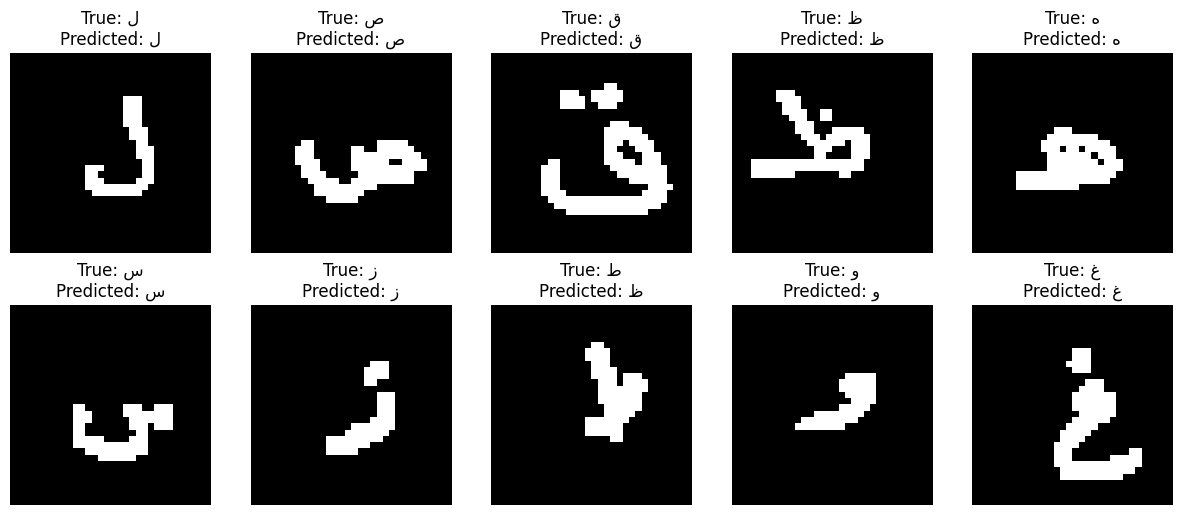

In [12]:
Display_Predictions(model_task1)

- model_task1.predict(X_test_normalized) uses the trained model to make predictions on X_test_normalized. The predict function outputs the probabilities that the input images belong to each of the 28 classes.

- Argmax for Predicted Labels: np.argmax(predictions, axis=1) converts these probabilities into class labels. np.argmax finds the indices of the maximum values along an axis.

- The visulazation takes 10 images from the testing images, and comapres the predicted labels to the true labels.

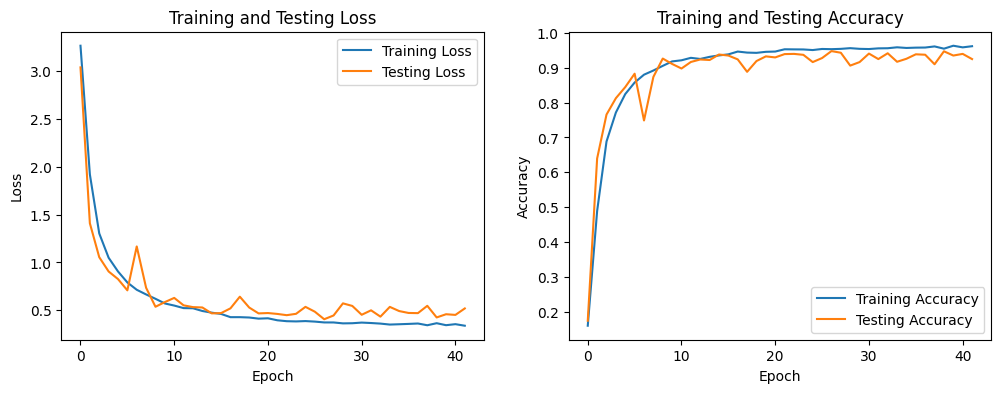

/tmp/ipykernel_26/3951568063.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['98.21%' '94.79%']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  results.iloc[0:2] = (results.iloc[0:2]*100).round(2).astype(str) + '%'
/tmp/ipykernel_26/3951568063.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  results.iloc[2:4] = results.iloc[2:4].applymap(lambda x: f'{x:.2f}')


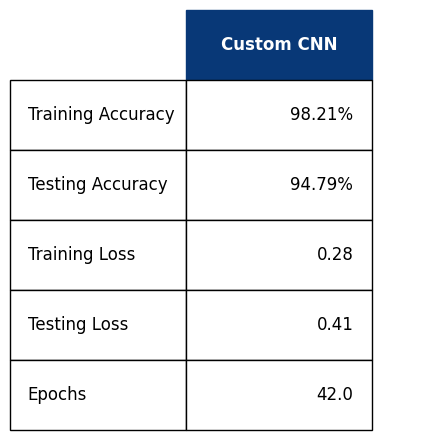

In [36]:
plot_hist(history_task1)

# Evaluate the model on the training set
train_loss, train_accuracy = model_task1.evaluate(X_train_normalized, y_train_one_hot, verbose=0)
test_loss, test_accuracy = model_task1.evaluate(X_test_normalized, y_test_one_hot, verbose=0)

results("Custom CNN",[train_accuracy,test_accuracy,train_loss,test_loss,early_stopping.stopped_epoch])

### Training and Validation Loss Graph/ Accuracy

Training Loss/Accuracy: (Blue Line), 
Validation Loss/Accuracy (Orange Line)


#### Training and Validation Loss Graph

X-axis (Epochs): One epoch means the model has seen the entire training dataset once.<br>
Y-axis (Loss): Indicates the model's error or loss, which is a measure of how far the model's predictions are from the actual values. The goal is to minimize this value.


Observations from the Loss Graph:

- The training loss decreases rapidly at the beginning and then continues to decline at a slower rate, which is a typical as the model begins to fit the training data.
- The validation loss also decreases initially, indicating that the model is learning generalizable patterns.

- The validation loss showed some fluctuations and minor increases in certain epochs but remains relatively stable. This behavior suggests that the model is not overfitting the training data excessively and has decent generalization to the validation set.


#### Training and Validation Accuracy Graph

X-axis (Epochs): Same as the loss graph, indicating the number of epochs.
Y-axis (Accuracy): Shows the percentage of correct predictions. Higher values indicate better performance.

Observations from the Accuracy Graph:


- Training accuracy quickly increases to near 100%, indicating the model fits the training data well.


- Validation accuracy also rises quickly, not as high as the training accuracy, which is common since the validation set is usually more challenging.
The validation accuracy converges and remains relatively flat, which suggests the model has learned as much as it can from the data provided.

#### Results

- Final Training Accuracy: 98.21% - Quite high, suggesting that the model has learned the training data very well.
- Test Loss: 0.41 - The model's loss on the test set, It's low, indicating good performance.
- Test Accuracy: 94.79% - This suggests that the model generalizes well to new data, though there's a slight drop compared to the training accuracy, which is normal.
- epochs: 42 - this shows that the model fit fast and has a good trade off between the time and accuracy.






# Task 2

# Introduction

Adding data augmentation to our custom model could have good impact:

* **Prevention of Overfitting**: Data augmentation increases the size of the training set by generating modified versions of the images. This helps the model generalize better by preventing it from learning noise and irrelevant details in the training data that do not generalize to new data.

* **Improved Generalization**: Augmented data helps the model to learn more robust features that are invariant to certain changes, like small rotations, translations, and scaling. ( which is important in our case )

but in the other hand, it has some cons:

* **Increased Training Time**: While data augmentation can improve model performance, it also means that each epoch may take longer to run because the model has more data to process. This can increase the overall time required to train the model.

* **Hyperparameters Tuning**: wrong tuning for the hyperparameters makes the model performance worse.

## Model Initilization

In [14]:
custom_model2 = CharacterRecognitionModel()

model_task2 = custom_model2.model

optimizer = Adam(learning_rate=0.001)
model_task2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

Another instance of our model was initialized here.

## Adding Data Augmentation

In [15]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)

datagen = ImageDataGenerator(
        rotation_range=5,  
        width_shift_range=0.1,  
        height_shift_range=0.1, 
) 


datagen.fit(X_train_normalized)

epochs = 300
batch_size = 128

history_task2 = model_task2.fit(
    datagen.flow(X_train_normalized, y_train_one_hot, batch_size=batch_size),
    steps_per_epoch=len(X_train_normalized) // batch_size,
    validation_data=(X_test_normalized, y_test_one_hot),
    epochs=epochs,
    callbacks=[early_stopping]
)


Epoch 1/300


2024-01-27 17:45:28.129295: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_4/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


105/105 [==============================] - 12s 51ms/step - loss: 3.2961 - accuracy: 0.1568 - val_loss: 3.2338 - val_accuracy: 0.1833
Epoch 2/300
105/105 [==============================] - 5s 49ms/step - loss: 1.9132 - accuracy: 0.4833 - val_loss: 1.8989 - val_accuracy: 0.5080
Epoch 3/300
105/105 [==============================] - 5s 49ms/step - loss: 1.3380 - accuracy: 0.6736 - val_loss: 0.9885 - val_accuracy: 0.7958
Epoch 4/300
105/105 [==============================] - 5s 50ms/step - loss: 1.0832 - accuracy: 0.7608 - val_loss: 0.9055 - val_accuracy: 0.8164
Epoch 5/300
105/105 [==============================] - 5s 50ms/step - loss: 0.9511 - accuracy: 0.8111 - val_loss: 0.9076 - val_accuracy: 0.8247
Epoch 6/300
105/105 [==============================] - 5s 48ms/step - loss: 0.8540 - accuracy: 0.8398 - val_loss: 0.7832 - val_accuracy: 0.8574
Epoch 7/300
105/105 [==============================] - 5s 47ms/step - loss: 0.7872 - accuracy: 0.8602 - val_loss: 0.7176 - val_accuracy: 0.8821
Epo

In this code, the same custom was used but with adding data augmentation, which makes the CNN more robust to variations in the position and orientation of objects within the images.

three types of image transformations are applied after hyperparameter tuning:

* rotation_range=5: This parameter allows random rotations of the images by up to 5 degrees, which helps the model to handle cases where the object's orientation varies slightly.

* width_shift_range=0.1: This will randomly shifts images horizontally by 10% (0.1) of the total width. This simulates the effect of objects being in different horizontal positions within the image and helps the model become invariant to such positional changes.

* height_shift_range=0.1: Similarly to the width_shift_range, this parameter shifts images vertically by 10% (0.1) of the total height, which helps the model learn to recognize objects regardless of their vertical position in the image.


## Model Testing

105/105 [==============================] - 0s 2ms/step


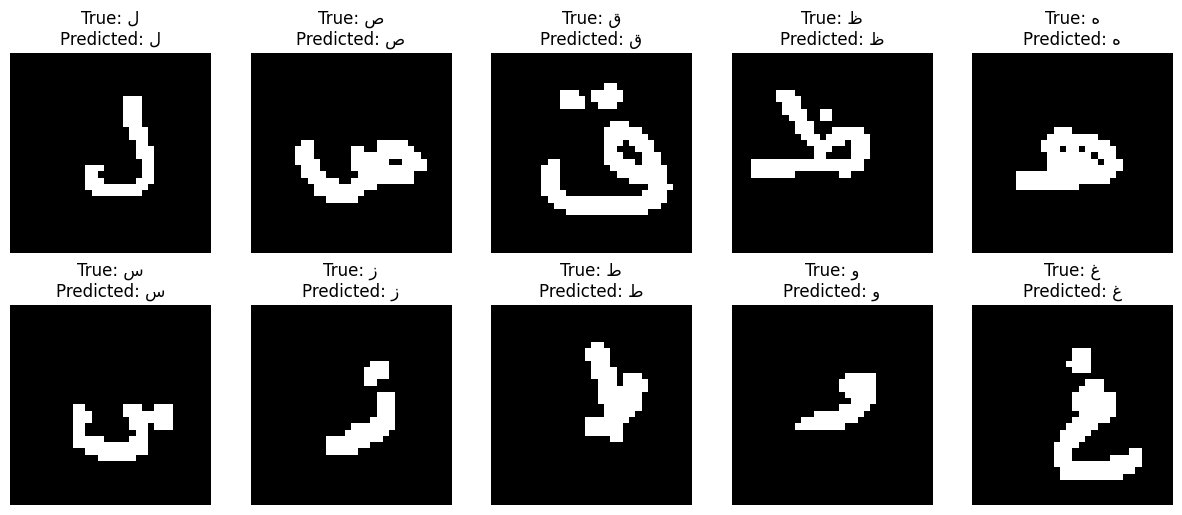

In [16]:
Display_Predictions(model_task2)

## Model Evaluation

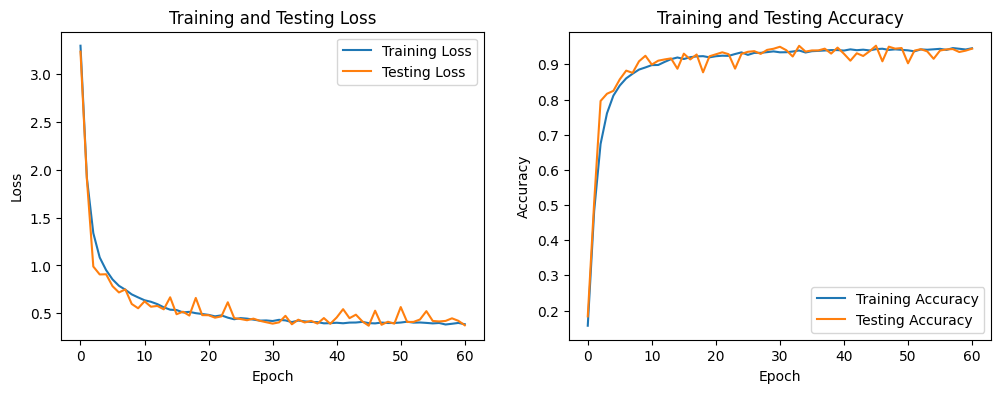

/tmp/ipykernel_26/3951568063.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['96.65%' '95.3%']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  results.iloc[0:2] = (results.iloc[0:2]*100).round(2).astype(str) + '%'
/tmp/ipykernel_26/3951568063.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  results.iloc[2:4] = results.iloc[2:4].applymap(lambda x: f'{x:.2f}')


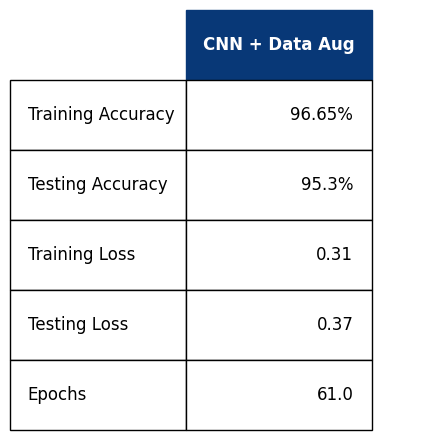

In [35]:
plot_hist(history_task2)

# Evaluate the model on the training set
train_loss, train_accuracy = model_task2.evaluate(X_train_normalized, y_train_one_hot, verbose=0)
test_loss, test_accuracy = model_task2.evaluate(X_test_normalized, y_test_one_hot, verbose=0)

results("CNN + Data Aug",[train_accuracy,test_accuracy,train_loss,test_loss,61])


# Results & Discussion

The good impact of adding data augmentation is noticable in many areas, including higher accuarcy and having less gap between training and testing accuarcy, which means that the model is generalizing well without overfitting. 

which makes it outperforms the custom model (Task 1) in term of accuracy and model efficiently, but not in term of time execution. 

* Training Accuracy (96.65%): This is a high accuracy rate, indicating that the model has learned the training data well. A training accuracy close to but not exactly 100% is typically a good sign; it suggests that the model has a good fit to the training data without memorizing it.

* Testing Accuracy (95.3%): The testing accuracy is only slightly lower than the training accuracy, which is a positive outcome. It implies that the model generalizes well to new data. The close proximity of these two accuracies shows that the model is not overfitted. 

* Training Loss (0.31) and Testing Loss (0.37): The training and testing losses are relatively low and close to each other. A lower loss indicates better model performance, and the fact that the testing loss is not much higher than the training loss suggests that the model's predictions are consistent across both sets.

* Epochs (61): The model was trained for 61 epochs. This number of epochs was sufficient for the model to converge to a good solution, as indicated by the stable and high accuracy and low loss. However, the number of epochs is higher than the first task which indicates the effect of data augmentation on the time.

* Training and Testing Loss Graph: The loss graph indicate that the model is learning effectively, and the close gap between training and testing loss suggests that the model is not overfitting.

* Training and Testing Accuracy: both training and testing lines on each graph follow similar trends suggests that the model is generalizing well without overfitting
 

### Comparing to previous tasks:

* Task 2 outperforms Task 1 by achieving a model that generalizes better to new data, as seen by the closer alignment of training and testing metrics and the more stable training process. The addition of data augmentation in Task 2 likely contributed to its performance by providing a bigger variety of training examples, as a result it improved the model's ability to generalize and reducing the risk of overfitting. Despite potentially longer training times due to the increased complexity of the augmented dataset, the benefits in model performance and generalization are clear.


# Task 3

# Introduction 

LeNet-5 is one of the earliest convolutional neural networks that significantly impacted the field of deep learning and is considered a foundational work for modern convolutional network architectures. It was developed by Yann LeCun et al. in the late 1980s and later published in a seminal 1998 paper. The architecture was originally designed for digit recognition tasks, such as reading zip codes and numbers, That is one of the reasons it performs well on this set of augumented data.

## Model Initilization


In [18]:
from tensorflow.keras.layers import Dense, AveragePooling2D, Dropout

def LeNet():
    model = Sequential()
    
    model.add(Conv2D(filters = 6, kernel_size = 5, strides = 1, activation = 'tanh',input_shape = (32,32,1), padding = 'same'))
    
    model.add(AveragePooling2D(pool_size = 2, strides = 2, padding = 'valid'))

    model.add(Conv2D(filters = 16, kernel_size = 5, strides = 1,activation = 'tanh',padding = 'valid'))
    
    model.add(AveragePooling2D(pool_size = 2, strides = 2, padding = 'valid'))
    
    model.add(Conv2D(filters = 120, kernel_size = 5, strides = 1,activation = 'tanh', padding = 'valid'))
    
    model.add(Flatten())
    
    model.add(Dense(units = 84, activation = 'tanh'))
    model.add(Dense(units = 28, activation = 'softmax'))
    
    return model

### Architecture


1. Convolutional Layer: 6 filters with a kernel size of 5x5 and uses the "tanh" activation function. 'Same' padding is used to maintain the input size.


2. Pooling Layer: An average pooling layer that downsamples the output of the previous layer by a factor of 2.


3. Convolutional Layer: The second convolutional layer increases the number of filters to 16, capturing more complex features.


4. Pooling Layer: Another average pooling layer further reduces the dimensionality.


5. Convolutional Layer: This layer significantly increases the number of filters to 120, the network's final classification layers.


- Flatten: The output of the final convolutional layer is flattened into a single vector of features, necessary to connect to the fully connected layers.


6. Fully Connected Layer: A dense layer with 84 units follows, using the "tanh" activation function.


7.  Output Layer: The final layer has 28 units with a softmax activation, which corresponds to the number of classes in your task (28 Arabic characters).



It is worth noting that the use of "tanh" activation functions and average pooling is indicative of the time when LeNet-5 was created since modern networks typically use ReLU activations and max pooling for their improved performance characteristics. Nevertheless, this architecture adapts it for a 28-class classification problem, such as the recognition of Arabic handwritten characters.


#### How is LeNet-5 less complex than CNN-14?

**Number of Layers**:<br>

- LeNet-5: Has a total of 7 layers, including 3 convolutional layers, 2 pooling layers, and 2 fully connected layers.


- CNN-14: As the name suggests, has 14 layers, which likely include more convolutional and pooling layers and 2 fully connected layers.




**Number of Filters**: <br>

- LeNet-5: Begins with 6 filters in the first layer and progresses to 16 and then 120 filters in subsequent convolutional layers.


- CNN-14: Starts with 32 filters and increases to 64, leading to a larger number of trainable parameters.




**Architecture Design**:<br>

- LeNet-5: An architecture that  designed for simpler tasks originally, such as digit recognition. Its low number of layers and low number of filters, reduces its capacity to learn complex features but also minimizes the risk of overfitting and reduces computational load.


- CNN-14: Capable of capturing more complex and abstract features from the images, which is necessary for recognizing a wide variety of patterns, such as those in handwritten Arabic characters. However, this also means a Higher risk of overfitting, and more computational power if not managed properly with techniques like regularization and dropout.




**Parameter Count**:<br>

- LeNet-5: Due to fewer and smaller filters and fewer layers, LeNet-5 has significantly fewer parameters compared to deeper models. This means the model has a smaller capacity, which is directly related to its complexity.


- CNN-14: More layers and larger filter banks lead to a higher number of parameters, increasing model complexity and computational requirements.




**Functionality and Performance**:<br>

- LeNet-5: Well-suited for less complex tasks where the feature space is not very high dimensional because of its simple architecture. It's faster to train and requires less data to generalize well.


- CNN-14: Performs better on complex tasks that require the model to learn a larger variety of features, like handwritten Arabic characters which have more complex and varied shapes than digits.


In [19]:
LeNet5 = LeNet()
LeNet5.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

LeNet5.summary()  

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 16, 16, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_17 (Conv2D)          (None, 12, 12, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 6, 6, 16)          0         
 gePooling2D)                                                    
                                                                 
 conv2d_18 (Conv2D)          (None, 2, 2, 120)         48120     
                                                                 
 flatten_2 (Flatten)         (None, 480)              

- Take a look at the parameter to see how this model is less complex than the one in task 1, which approximately has 350k parameters.

## Adding Data Augmentation

In [20]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)

datagen = ImageDataGenerator(
        rotation_range=5, 
        width_shift_range=0.1, 
        height_shift_range=0.1,  
) 

datagen.fit(X_train_normalized)

#LeNet5 model with early stopping
epochs = 300
batch_size = 128

history_LeNet = LeNet5.fit(
    datagen.flow(X_train_normalized, y_train_one_hot, batch_size=batch_size),
    steps_per_epoch=len(X_train_normalized) / batch_size,
    validation_data=(X_test_normalized, y_test_one_hot),
    epochs=epochs,
    callbacks=[early_stopping]
)

Epoch 1/300
105/105 [==============================] - 8s 48ms/step - loss: 2.6992 - accuracy: 0.2156 - val_loss: 1.9997 - val_accuracy: 0.4086
Epoch 2/300
105/105 [==============================] - 5s 46ms/step - loss: 2.0814 - accuracy: 0.3856 - val_loss: 1.6365 - val_accuracy: 0.5146
Epoch 3/300
105/105 [==============================] - 5s 47ms/step - loss: 1.7022 - accuracy: 0.4882 - val_loss: 1.2814 - val_accuracy: 0.6152
Epoch 4/300
105/105 [==============================] - 5s 48ms/step - loss: 1.3784 - accuracy: 0.5751 - val_loss: 1.0590 - val_accuracy: 0.6690
Epoch 5/300
105/105 [==============================] - 5s 46ms/step - loss: 1.1545 - accuracy: 0.6342 - val_loss: 0.9229 - val_accuracy: 0.6914
Epoch 6/300
105/105 [==============================] - 5s 47ms/step - loss: 1.0050 - accuracy: 0.6760 - val_loss: 0.8033 - val_accuracy: 0.7378
Epoch 7/300
105/105 [==============================] - 5s 46ms/step - loss: 0.9044 - accuracy: 0.7073 - val_loss: 0.7197 - val_accuracy:

- Early Stoppage is used to stop the network when the tessting accuracy converges, the same as explained in the first section.

- We use the augumented data used in task 2, thus giving an advantage to this model to perform better than usual.

- The parameters of the LeNet.fit() are the same in the first section, which were explained in detail.

## Model Evaluation

105/105 [==============================] - 0s 2ms/step


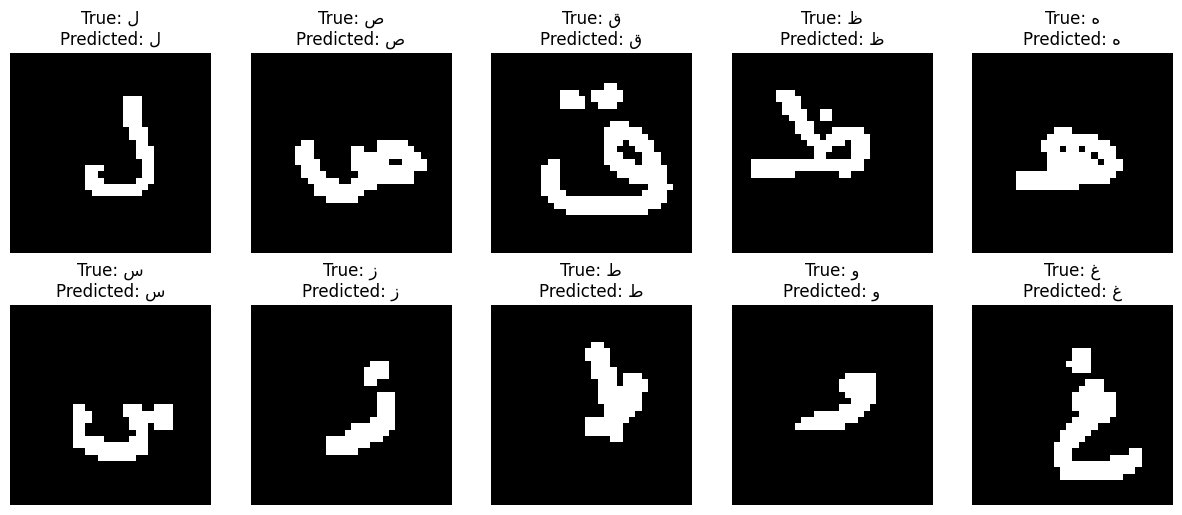

In [21]:
Display_Predictions(LeNet5)

- The predictions are processed and predicted same as previously.

- The visulazation takes 10 images from the testing images, and comapres the predicted labels to the true labels.


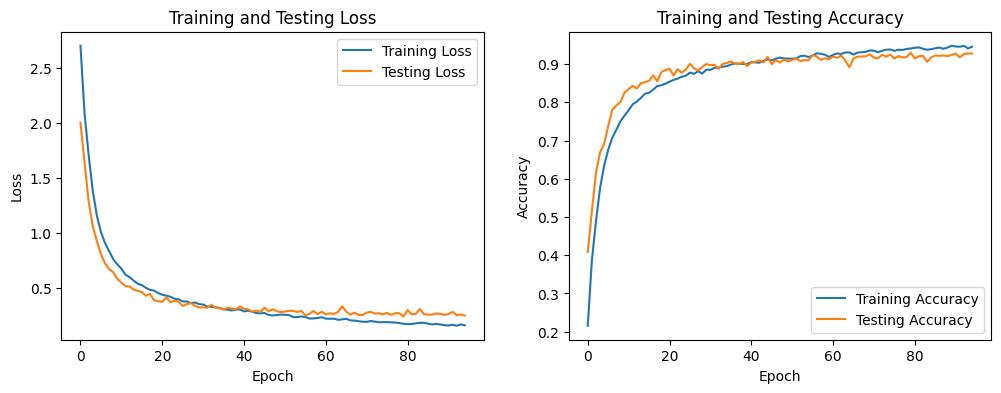

/tmp/ipykernel_26/3951568063.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['96.5%' '92.98%']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  results.iloc[0:2] = (results.iloc[0:2]*100).round(2).astype(str) + '%'
/tmp/ipykernel_26/3951568063.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  results.iloc[2:4] = results.iloc[2:4].applymap(lambda x: f'{x:.2f}')


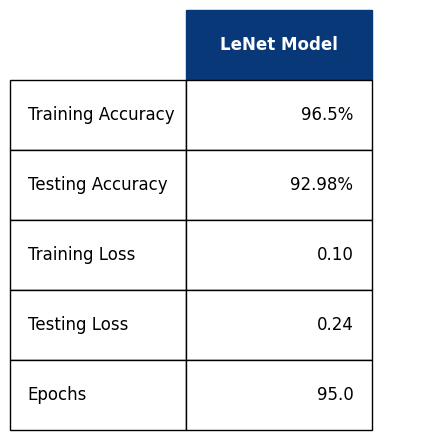

In [33]:
plot_hist(history_LeNet)

# Evaluate the model on the training set
train_loss, train_accuracy = LeNet5.evaluate(X_train_normalized, y_train_one_hot, verbose=0)
test_loss, test_accuracy = LeNet5.evaluate(X_test_normalized, y_test_one_hot, verbose=0)

results("LeNet Model",[train_accuracy,test_accuracy,train_loss,test_loss,early_stopping.stopped_epoch])


- this model has a good performance but not the best, since it's not designed to our specific case.

- The graphs presented show the training and validation loss, and accuracy over approximately 75 epochs for a neural network model being trained for a classification task.

#### Training and Validation Loss Graph
- Training Loss (Blue Line): Starts very high then drops sharply within the first few epochs. After the initial drop, the training loss continues to decrease, but at a much slower rate, gradually approaching a lower value. This trend indicates that the model is becoming more accurate in its predictions on the training data over time.


- Validation Loss (Orange Line): Decreases but is generally higher throughout the training process. After the initial steep decrease, it begins to converge, showing small fluctuations but no significant increase, which is a good sign that the model is not overfitting.


#### Training and Validation Accuracy Graph
- Training Accuracy (Blue Line): Increases sharply at the start, The accuracy quickly approaches a high value, suggesting that the model fits the training data well.


- Validation Accuracy (Orange Line): Also increases quickly at the start and continues to rise, though it remains slightly below the training accuracy. The convergence of the validation accuracy close to the training accuracy indicate good generalization. There's a small gap between the two, which is normal and reflects the challenges of predicting unseen data.

### Numeric Metrics

- Final Training Accuracy: 96.5% -  There is some room for improvement compared to a near-perfect fit.
- Test Loss: 0.24 - A value of 0.24 suggests that the model's predictions are relatively close to the true values.
- Test Accuracy: 92.98% - The model has a high accuracy rate on the test data, which is an excellent indicator of its ability to generalize to unseen data.
- epochs: 95 - which is a high number compared to the previous two tasks


### Comaprison to previous tasks:

* LeNet-5 model shows comparable generalization capability when compared to the models in Task 1 and Task 2. The minimal gap between training and testing accuracy, along with the low and stable testing loss, suggests that LeNet-5 is a strong model for the task of Arabic handwritten character recognition. It achieves this while potentially offering benefits in terms of model simplicity, computational efficiency, and ease of training, all of this with less complexity than the previous models.

# Task4


# Introduction on Transfer learning

- Transfer learning is a valuable approach in machine learning that capitalizes on pre-existing knowledge from one task to accelerate learning and improve performance on a related task

- Transfer learning starts with a model that has been trained on a large dataset for a specific task, like image classification or natural language understanding.

- it involves using the pre-trained model's layers to extract useful features or representations from the data, instead of training a new model from scratch.


- The transferred model can be further trained (fine-tuned) on the new task using a smaller dataset to adapt the model to the specific nuances of the target problem.


- Fine-tuning Strategies: Feature Extraction, Fine-Tuning and Fine-Tuning the whole network

- Data Augmentation: Regardless of the chosen strategy, data augmentation technique must be used to artificially increase
the size of the target dataset.

## Loading Pre-trained Model

In [23]:
model_path = '/kaggle/input/englishrecmodel/ConvModel.h5'
model_transfer = load_model(model_path)

model_transfer.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 7, 7, 32)          0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 7, 7, 32)          128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 batch_normalization_1 (Bat  (None, 7, 7, 64)          256       
 chNormalization)                                                
                                                        

We got a pre-trained model for an english handwritten recognition dataset, which is a similar task to ours.

the pre-trained model conatins the following:

> 7 Conv2D Layers: These are the main layers for feature extraction in the network.

> 3 MaxPooling2D Layers: used for downsampling the feature maps.

> 6 BatchNormalization Layers: used to normalize the activations from the previous layers and help in stabilizing the learning process.

> 1 GlobalAveragePooling2D Layer: used to reduce the spatial dimensions of the input to a single vector per feature map.

> 2 Dense Layers: used for classification based on the features extracted by the Conv2D and pooling layers.

> 1 Dropout Layer: used for regularization to prevent overfitting.

Model Reference: https://www.kaggle.com/code/utkarshsaxenadn/a-z-alphabet-recognition-custom-model-acc-99/input


In [24]:
# Define new input shape
new_input = Input(shape=(32, 32, 1))
x = Conv2D(32, kernel_size=(3, 3), activation='relu')(new_input)

# Reusing layers from the loaded model and freezing them
for layer in model_transfer.layers[1:-4]:
    if layer == model_transfer.layers[-3]:
        continue
    layer.trainable = False
    x = layer(x)

# New layers added remain trainable
x = MaxPooling2D(pool_size=(2, 2))(x)
x = BatchNormalization(momentum=0.7)(x)

x = Dropout(0.3)(x)  # Dropout layer

x = Flatten()(x)

x = Dense(256, activation='relu')(x)
# x = Dropout(0.25)(x)  # Dropout to prevent overfitting
x = Dense(256, activation='relu')(x)
# x = Dropout(0.25)(x)  # Another Dropout layer
output = Dense(28, activation='softmax')(x)  # Output layer for 28 classes

# Create and compile the model
model_task4 = Model(inputs=new_input, outputs=output)
model_task4.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Phase 1: Train only the new layers
epochs_phase1 = 20
batch_size = 128

datagen = ImageDataGenerator(
        rotation_range=5,  
        width_shift_range=0.1,  
        height_shift_range=0.1, 
) 

datagen.fit(X_train_normalized)

# Phase 1: Train only the new layers with data augmentation
history_phase1 = model_task4.fit(
    datagen.flow(X_train_normalized, y_train_one_hot, batch_size=batch_size),
    steps_per_epoch=len(X_train_normalized) // batch_size,
    validation_data=(X_test_normalized, y_test_one_hot),
    epochs=epochs_phase1
)

Epoch 1/20


2024-01-27 17:58:49.220162: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout_8/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


105/105 [==============================] - 8s 51ms/step - loss: 3.0910 - accuracy: 0.1168 - val_loss: 2.5164 - val_accuracy: 0.2494
Epoch 2/20
105/105 [==============================] - 5s 48ms/step - loss: 2.5021 - accuracy: 0.2460 - val_loss: 2.0122 - val_accuracy: 0.3911
Epoch 3/20
105/105 [==============================] - 5s 49ms/step - loss: 2.1744 - accuracy: 0.3371 - val_loss: 1.7072 - val_accuracy: 0.4750
Epoch 4/20
105/105 [==============================] - 5s 48ms/step - loss: 1.9522 - accuracy: 0.3920 - val_loss: 1.4721 - val_accuracy: 0.5390
Epoch 5/20
105/105 [==============================] - 5s 48ms/step - loss: 1.8114 - accuracy: 0.4295 - val_loss: 1.3294 - val_accuracy: 0.5830
Epoch 6/20
105/105 [==============================] - 5s 47ms/step - loss: 1.6750 - accuracy: 0.4696 - val_loss: 1.2257 - val_accuracy: 0.6182
Epoch 7/20
105/105 [==============================] - 5s 48ms/step - loss: 1.5928 - accuracy: 0.4961 - val_loss: 1.1253 - val_accuracy: 0.6345
Epoch 8/20

After getting the pre-trained model and exploring the layer it has, next step is the Fine-tuning.

Fine-tuning is a super-powerful method to obtain image classifiers on your own custom datasets from pre-trained CNNs.

Fine-tuning is a multi-step process and it was by the following:

* The fully connected layers at the end of the network were removed (where the actual class label predictions are made).

* The fully connected layers were replaced with new initialized ones.

* The earlier CONV layers earlier in the network were freezed to ensure that any previous robust features learned by the CNN are not destroyed.

* Training only the FC layer heads to learn patterns from our dataset.

* Then all of the CONV layers were unfreezed in the network and perform a second pass of training to achieve the best performance (in the below part).


Reference: https://pyimagesearch.com/2019/06/03/fine-tuning-with-keras-and-deep-learning/


In [25]:
# Phase 2: Unfreeze all layers and continue training
for layer in model_task4.layers:
    layer.trainable = True

# It's advisable to lower the learning rate when fine-tuning the entire network
model_task4.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

epochs_phase2 = 300

datagen = ImageDataGenerator(
        rotation_range=5,  
        width_shift_range=0.1,  
        height_shift_range=0.1, 
) 

datagen.fit(X_train_normalized)

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)

# Phase 1: Train only the new layers with data augmentation and early stopping
history_phase2 = model_task4.fit(
    datagen.flow(X_train_normalized, y_train_one_hot, batch_size=batch_size),
    steps_per_epoch=len(X_train_normalized) // batch_size,
    validation_data=(X_test_normalized, y_test_one_hot),
    epochs=epochs_phase2,
    callbacks=[early_stopping]
)

Epoch 1/300


2024-01-27 18:00:36.072829: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout_8/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


105/105 [==============================] - 12s 53ms/step - loss: 8.6718 - accuracy: 0.4577 - val_loss: 9.1685 - val_accuracy: 0.0473
Epoch 2/300
105/105 [==============================] - 5s 50ms/step - loss: 2.5113 - accuracy: 0.5574 - val_loss: 5.6919 - val_accuracy: 0.0399
Epoch 3/300
105/105 [==============================] - 5s 50ms/step - loss: 1.5879 - accuracy: 0.5900 - val_loss: 5.1674 - val_accuracy: 0.0405
Epoch 4/300
105/105 [==============================] - 5s 50ms/step - loss: 1.2487 - accuracy: 0.6311 - val_loss: 4.6730 - val_accuracy: 0.0420
Epoch 5/300
105/105 [==============================] - 5s 51ms/step - loss: 1.0921 - accuracy: 0.6584 - val_loss: 4.4263 - val_accuracy: 0.0702
Epoch 6/300
105/105 [==============================] - 6s 53ms/step - loss: 0.9682 - accuracy: 0.6901 - val_loss: 3.4369 - val_accuracy: 0.1155
Epoch 7/300
105/105 [==============================] - 5s 50ms/step - loss: 0.8826 - accuracy: 0.7147 - val_loss: 2.7787 - val_accuracy: 0.1964
Epo


* Fine-Tuning the whole network was needed in this part, since the results were bad when training only the FC layers on the dataset.

* The model was trained in two phases


* After the FC head has started to learn patterns in our dataset, the training was paused to unfreeze the body, and continue training.


* The idea of training the model in two phases is to avoid altering our CONV filters dramatically, which lead to higher accuracy.



105/105 [==============================] - 0s 3ms/step


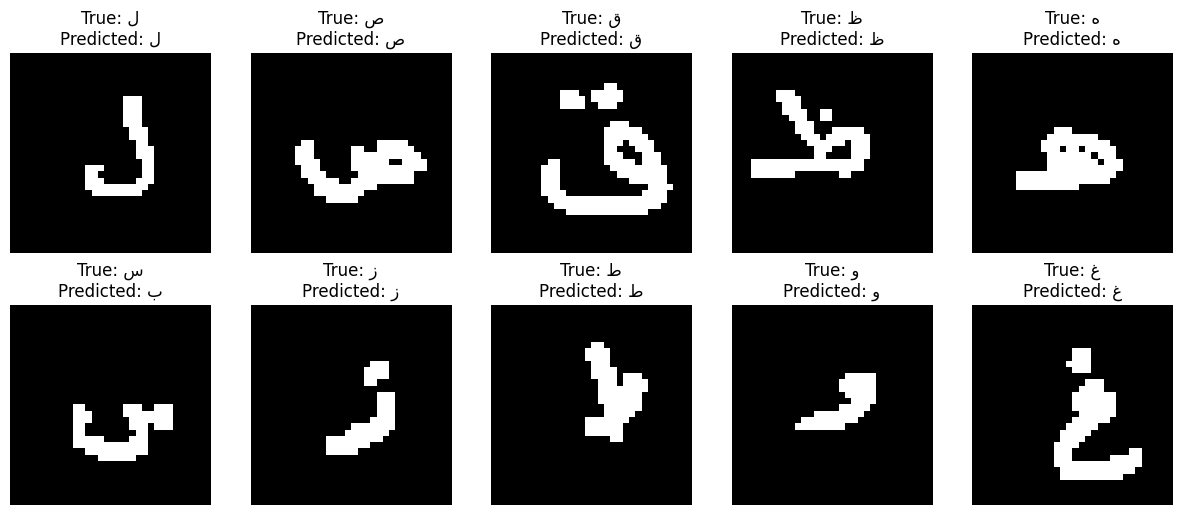

In [26]:
Display_Predictions(model_task4)

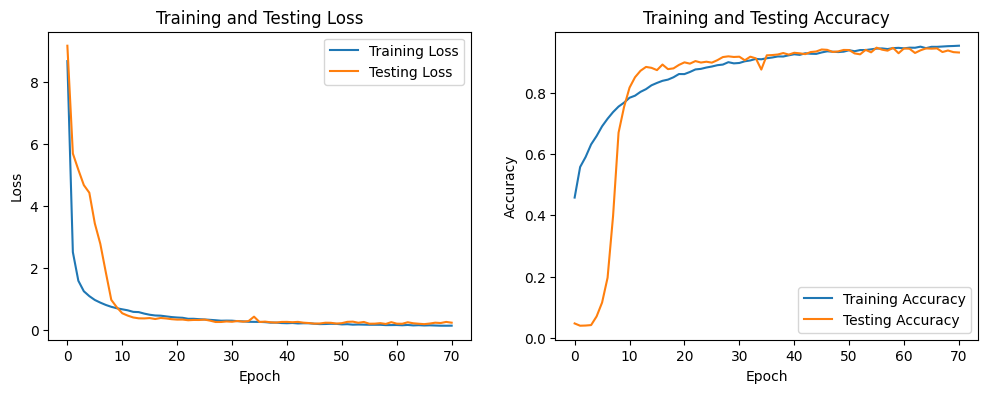

105/105 [==============================] - 0s 4ms/step - loss: 0.2023 - accuracy: 0.9464


/tmp/ipykernel_26/3951568063.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['97.23%' '94.64%']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  results.iloc[0:2] = (results.iloc[0:2]*100).round(2).astype(str) + '%'
/tmp/ipykernel_26/3951568063.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  results.iloc[2:4] = results.iloc[2:4].applymap(lambda x: f'{x:.2f}')


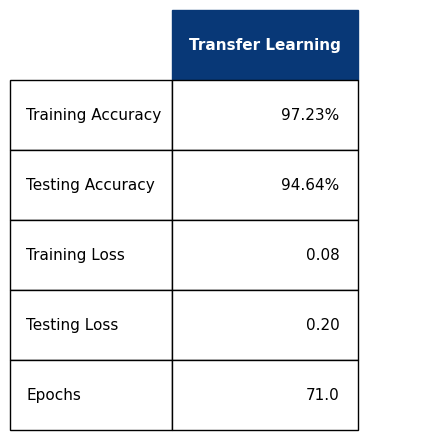

In [34]:
plot_hist(history_phase2)

# Evaluate the model on the training set
train_loss, train_accuracy = model_task4.evaluate(X_train_normalized, y_train_one_hot, verbose=0)
test_loss, test_accuracy = model_task4.evaluate(X_test_normalized, y_test_one_hot, verbose=1)

results("Transfer Learning",[train_accuracy,test_accuracy,train_loss,test_loss,early_stopping.stopped_epoch])


# Results & Discussion

The transfer learning approach was successful, The model has high accuracy on both the training and test sets. Morever, the number of epochs was good for a similiar model not a for our specific task. 

* The curves are converging, which indicates that the model is generalizing well and there is a minimal gap between training and validation performance.

* The final training accuracy is 97.23%, which is a high accuracy rate and suggests that the model has learned to classify the training data effectively.

* The test accuracy is 94.64%, which is slightly lower than the training accuracy but still indicates a high level of performance on unseen data.

* Training Loss (0.08): A loss of 0.08 is very low, meaning the model's predictions are, on average, very close to the actual values.

* Testing Loss (0.20): The testing loss is higher than the training loss, which is expected because the testing data represents new challenges for the model. However, a loss of 0.20 is still low.

* Epochs (71): The model was trained for 71 epochs. This number of epochs was sufficient for the model to converge to a good solution.

#### Comparsion to previous tasks

* This transfer learning model shows excellent generalization capabilities, as shown by the close alignment of training and testing loss and accuracy. The model acheived high accuracy without significant overfitting, reflected in the small gap between training and testing accuracy. Compared to the other tasks, Task 4 shows the efficiency of transfer learning in achieving high performance on a complex task like Arabic handwritten character recognition.

* The comparison suggests that transfer learning gives pre-trained knowledge a head start in training and promotes a model that generalizes well to new data. This is beneficial in scenarios where the available labeled data for the specific task may be limited. The stability and high performance of the transfer learning model make it a strong candidate for practical applications.


# Conclusion

Throughout the project, various neural network architectures and strategies were explored to tackle the challenge of recognizing Arabic handwritten characters, a task complicated by the wide variability in handwriting styles.   The models were evaluated based on their training and validation loss, accuracy, and generalization to unseen test data.

Task 1: Custom CNN Model:
The custom CNN model displayed exceptional learning capabilities, achieving a final training accuracy of 98.21%. The validation loss stabilized after initial fluctuations, suggesting good behaviour against overfitting. This model's ability to generalize was evident with a high test accuracy of 94.79%, though it was slightly lower than the training accuracy, which is a typical observation.

Task 2: Data Augmentation:
By introducing data augmentation, A major enhancement in the model's performance was seen, particularly in its generalization power. The model achieved a training accuracy of 96.65% and a closely related test accuracy of 95.3%, showing that the gap between training and testing performance narrowed (far more stable), a strong indicator of effective learning and generalization. Despite a longer convergence time, the gains in accuracy justify the additional computational resources.

Task 3: LeNet-5 Architecture:
LeNet-5, a historically significant model, was adapted for our task and trained for 95 epochs via early stoppage. It achieved a commendable final training accuracy of 96.5%, with a test loss and accuracy of 0.24 and 92.98%, respectively. The model's performance on the test set confirms its effectiveness in handling the complexity of Arabic script recognition, though it presented a slightly larger gap between training and testing results compared to Task 1, that shows the trade between complexity and accuracy in this section.

Task 4: Transfer Learning:
The application of transfer learning yielded promising results, with the model demonstrating high accuracy levels of 97.23% on the training set and 94.64% on the test set. The low training and testing losses (0.08 and 0.20, respectively) signify the model's precision in making predictions. The success of this approach underlines the advantage of leveraging pre-trained models to accelerate learning and enhance performance on specialized tasks.

Across all tasks, our models have shown that deep learning can effectively recognize and interpret Arabic handwritten characters with high accuracy. The application of data augmentation and transfer learning has particularly stood out as strategies that significantly boost model performance. The project's success in achieving high accuracy with minimal overfitting across different architectures emphasizes the potential of these models in the real-world, solving applications like digitalizing historical documents to developing intuitive user interfaces for the Arabic language.

In conclusion, this project has made progress in Arabic handwriting recognition, providing insights into the design and training of effective neural network models. Advancing the arabic handwriting recognition technology.